In [2]:
# 신뢰 수준 + 유의 수준 = 1 


# 모수 통계 - 확률분포를 가정 했을 때
#비모수 통계 - 
# 막대그래프는 빈도수
# 

In [3]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import os
import matplotlib.font_manager as fm

font_location  = 'malgun.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
plt.rc('font', family = font_name)


plt.rc('axes', unicode_minus=False)

In [6]:
ds_mycars = pd.read_csv(os.getcwd()+'/통계수업파일/mycars.csv',engine='python')

In [8]:
ds_mycars.head()
# 제조자 
# 모델명 
# mpg = 연비
# 고속도로 연비
# 연료
# suvd인지 compact인지

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [10]:
ds_mycars.describe().round(3)


,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [46]:
df = ds_mycars[['model','mpg']]
df = df.groupby('model').describe()
df

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [49]:
df = ds_mycars[['mpg','manufacturer']]
df = df.groupby('manufacturer').describe()
df

mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [50]:
df = ds_mycars[['mpg','automatic']]
df = df.groupby('automatic').describe()
df

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [54]:
ds_Exh_QC1 = pd.read_csv(os.getcwd()+'/통계수업파일/EXH_QC1.csv',engine='python')
df = ds_Exh_QC1[['Flaws','Period']]

In [59]:
count = df['Flaws'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count) *100
cumpct = np.cumsum(percent)
cumpct

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64

In [65]:
count_data = pd.DataFrame({'Count': count,'CumCnt':cumcnt,'Percent':percent,'Cumpct':cumpct})
count_data.columns.name = 'Flaws'
count_data

Flaws,Count,CumCnt,Percent,Cumpct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [68]:
count2 = df['Period'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2 / sum(count2)*100
cumpct2 = np.cumsum(percent2)
count_data2 = pd.DataFrame({'Count':count2 , 'CumCnt':cumcnt2, 'Percent':percent2, 'Cumpct':cumpct2})
count_data2.columns.name = 'Period'
count_data2

Period,Count,CumCnt,Percent,Cumpct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


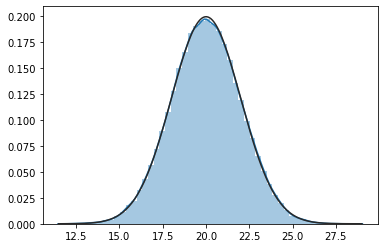

In [72]:
#정규 분포 그리기
np.random.seed(seed=1234)
normal = np.random.normal(20,2,100000)
sns.distplot(normal,fit = stats.norm, kde=True)

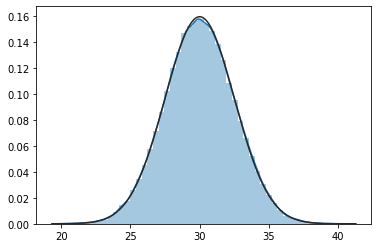

In [73]:
# 평균 30 , std = 2.5인 경우
np.random.seed(seed=1234)
normal = np.random.normal(30,2.5,100000)
sns.distplot(normal,fit = stats.norm, kde=True)

In [96]:
mu=115
sigma = 20
x= 135
prob = stats.norm.cdf(x,mu,sigma)
# print("{0}분 이상 걸리는 a/s 작업 비율: {1:.1f}%".format(x,(1-prob)*100))
print("%d분 이상 걸리는 A/S 작업 비율:%f" %(x,(1-prob)*100))

135분 이상 걸리는 A/S 작업 비율:15.865525


In [88]:
mu=175
sigma = 5
x= 179
prob = stats.norm.cdf(x,mu,sigma)
print("{0}분 이상 걸리는 a/s 작업 비율: {1:.1f}%".format(x,(1-prob)*100))
# print("%d분 이상 걸리는 A/S 작업 비율:%f %" %(x,(1-prob)*100))

179분 이상 걸리는 a/s 작업 비율: 21.2%


In [94]:
print("%d분 %f" %(1, 2*100))

1분 200.000000


In [99]:
mu = 12
sigma = 3
x1 = 15
prob1 = stats.norm.cdf(x1,mu,sigma)
print("%dkm 이상 %dkm 이하를 달릴 확률은 %f" %(mu,x1,(prob1-0.5)*100))

12km 이상 15km 이하를 달릴 확률은 34.134475


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


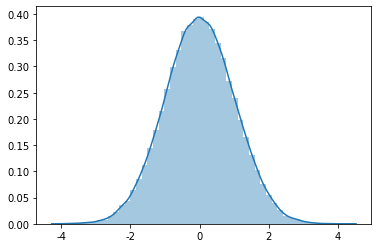

In [5]:
#표준 정규 분포
np.random.seed(1234)
normal = np.random.normal(0,1,100000)

sns.distplot(normal)

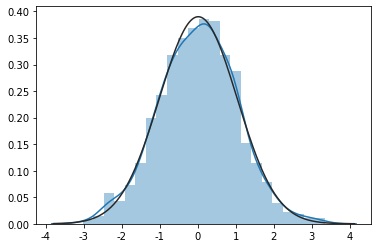

In [6]:
# t분포 연습
np.random.seed(1234)
t_df29 = np.random.standard_t(df=29 , size = 1000)
sns.distplot(t_df29,fit=stats.norm, kde=True)

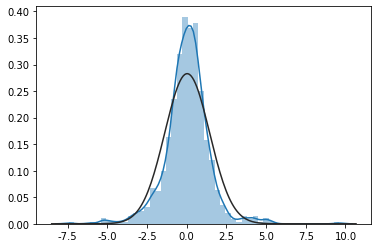

In [17]:
# t분포 연습
np.random.seed(1234)
t_df29 = np.random.standard_t(df=4 , size = 1000)
sns.distplot(t_df29,fit=stats.norm, kde=True)

In [18]:
t= 1.53
df = 5
prob = stats.t.cdf(t,df)
print("P(T<=F): %f" %prob)

P(T<=F): 0.906715


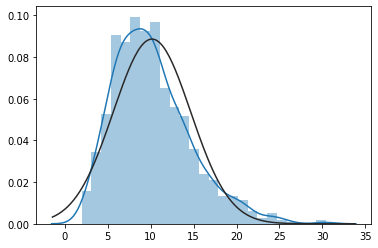

In [22]:
# 카이스퀘어 연습
np.random.seed(1234)
chisq_df10 = np.random.chisquare(df=10 , size =1000)
sns.distplot(chisq_df10, fit = stats.norm, kde=True)

In [27]:
chisq = 30
df = 30
prob = stats.chi2.cdf(chisq, df)
print("P(X<=%d): %f" %(chisq , prob))

P(X<=30): 0.534346


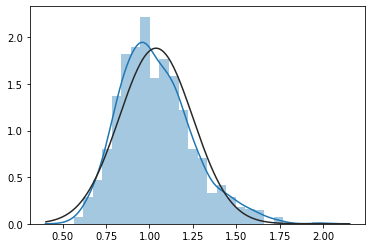

In [31]:
np.random.seed(seed = 1234)
f_df10_10 = np.random.f(dfnum=100, dfden=100, size=1000)
sns.distplot(f_df10_10,fit = stats.norm, kde = True)


In [32]:
f=2.0
dfnum= 15
dfden = 15
prob = stats.f.cdf(x=f, dfn = dfnum ,dfd = dfden)
print(prob)

0.9044711863270478


In [33]:
x= 1500
alpha = 2.2
beta = 1200

prob = stats.weibull_min.cdf(x,alpha, scale = beta)

print(1-prob)

0.19518415119971322


In [34]:
x= 2500
alpha = 5.2
beta = 2200

prob = stats.weibull_min.cdf(x,alpha, scale = beta)

print(1-prob)



0.14313422600568781


In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import os
import matplotlib.font_manager as fm

In [ ]:
df = pd.DataFrame({'A':[25,30,20,23,27,33,23,20,25,24],
                  'B':[31,30,34,30,28,31,30,31,32,30]})